# Explore data

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%config InlineBackend.figure_format = 'retina'

In [4]:
df_raw_orig = pd.read_csv('../data/12418_1589594021081.csv')
df_raw = df_raw_orig.drop(columns=['timestamp']).set_index(pd.DatetimeIndex(data=df_raw_orig.timestamp))

In [5]:
rename_dict = {'humidity in % (SHT31 - Humidity)':'humidity',
       'air temperature in ºC (SHT31 - Temperature)':'temp_C',
       'barometric pressure in K Pa (MPL3115A2 - Barometric Pressure)':'pressure_KPa', 
        'eCO2 in ppm (AMS CCS811 - eCO2)':'eCO2',
       'TVOC in ppb (AMS CCS811 - TVOC)':'TVOC', 
       'light in Lux (BH1730FVC)':'light_lux',
       'PM 1 in ug/m3 (PMS5003_AVG-PM1)':'PM1',
        'noise in dBA (ICS43432 - Noise)':'noise_dB',
       'PM 10 in ug/m3 (PMS5003_AVG-PM10)':'PM10',
       'PM 2.5 in ug/m3 (PMS5003_AVG-PM2.5)':'PM2p5'}

In [6]:
df = df_raw.rename(columns=rename_dict)[rename_dict.values()]
NN = len(df)

In [7]:
df['pressure_atm'] = df['pressure_KPa']*0.00986923
df['temp_F'] = df.temp_C *9/5 + 32
df = df.drop(columns=['pressure_KPa', 'temp_C'])

In [8]:
df = df.set_index(df_raw.index - pd.Timedelta(5, unit='hour'))

In [9]:
df.head(2)

,humidity,eCO2,TVOC,light_lux,PM1,noise_dB,PM10,PM2p5,pressure_atm,temp_F
timestamp,,,,,,,,,,
2020-04-23 22:10:11+00:00,57.78,400.0,0.0,12,NaN,49.36,NaN,NaN,0.972909,76.928
2020-04-23 22:11:11+00:00,57.99,400.0,0.0,13,NaN,49.33,NaN,NaN,0.972909,76.748


In [10]:
def plot_daytime_bands(df, alpha=0.1):
    for day, group in df.groupby(df.index.day):
        lo, hi = ((pd.DatetimeIndex(group.index.date)+ pd.Timedelta(7, unit='hour'))[0],
                  (pd.DatetimeIndex(group.index.date)+ pd.Timedelta(20, unit='hour'))[0])
        plt.axvspan(lo, hi, color='y', alpha=alpha)

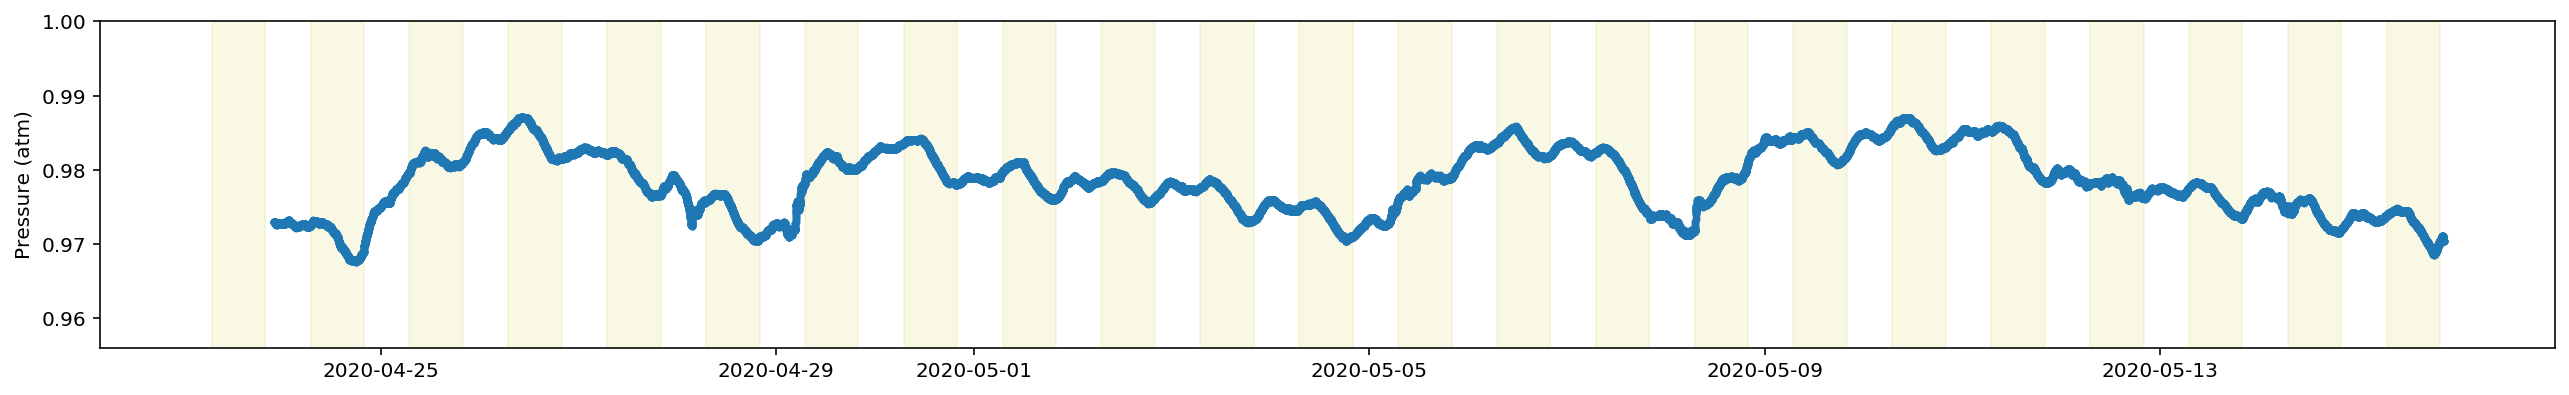

In [11]:
plt.figure(figsize=(22, 3))
plt.plot(df['pressure_atm'], '.')
plt.ylim(0.956, 1.0); plt.ylabel('Pressure (atm)')
plot_daytime_bands(df)

Pressure ebbs and flows on few-day timescales.  There appears to be some intra-day signal, but largely the presure has 3-4 day correlations.

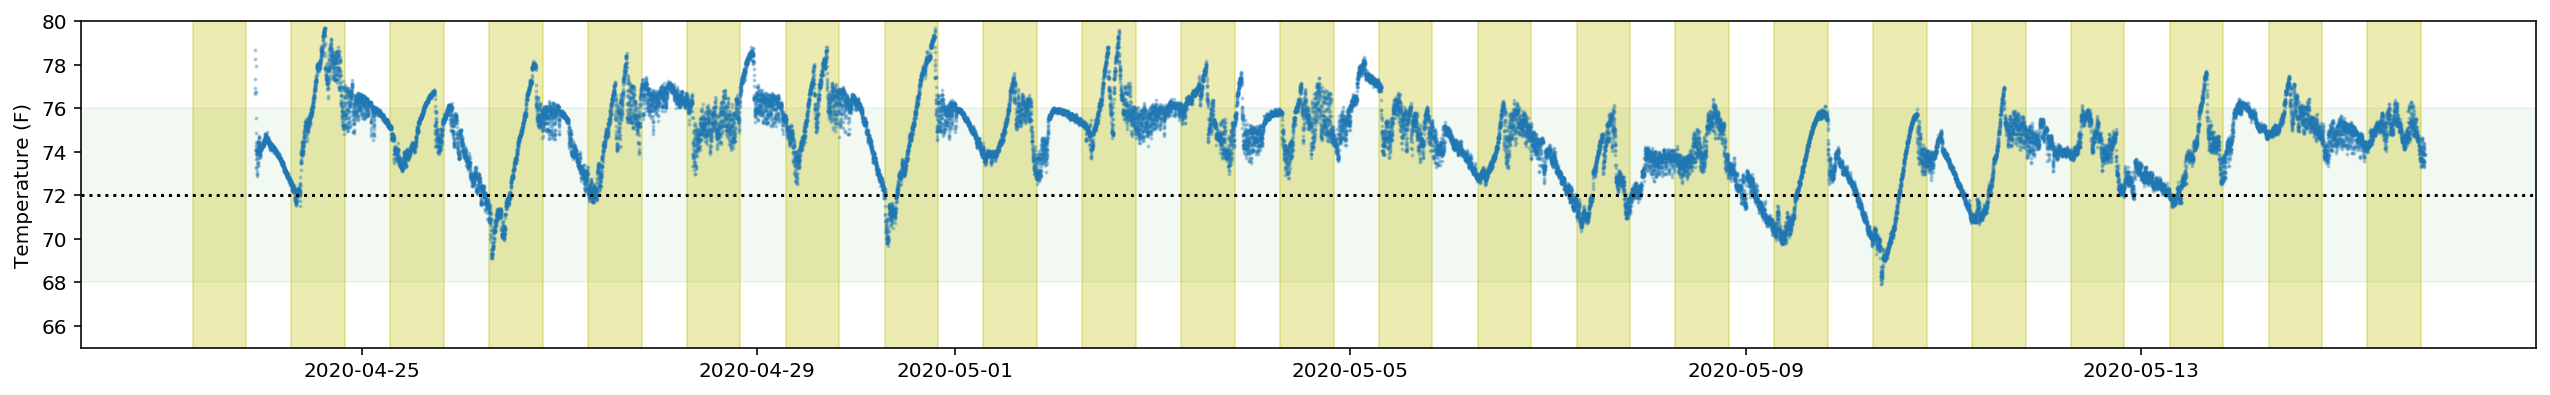

In [12]:
plt.figure(figsize=(22, 3))
plt.plot(df['temp_F'], 'o', ms=1, alpha=0.3); plt.axhline(72, color='k', linestyle=':')
plt.axhspan(68, 76, color='g', alpha=0.05)
plt.ylim(65, 80); plt.ylabel('Temperature (F)')
plot_daytime_bands(df, alpha=0.3)

Awesome!  The temperature rises throughout the day and falls at night.

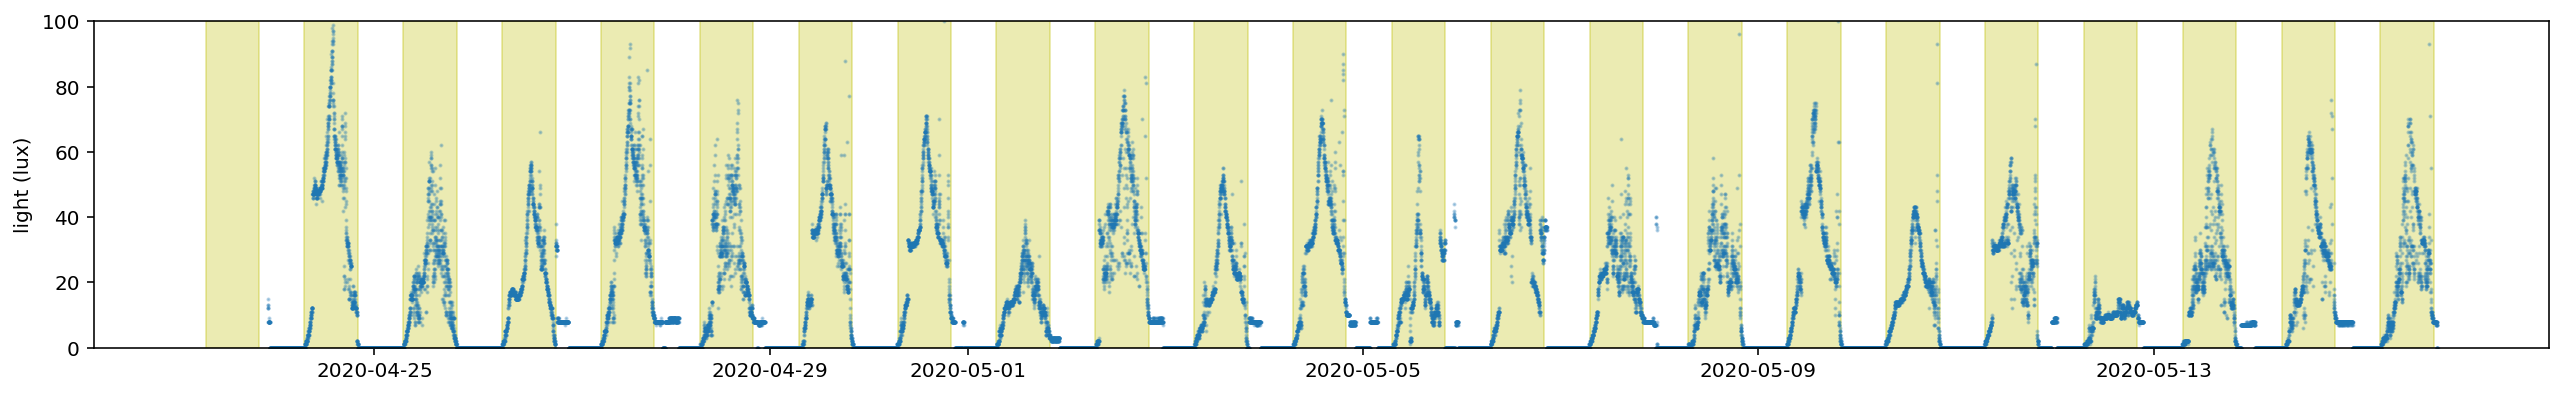

In [13]:
plt.figure(figsize=(22, 3))
plt.plot(df['light_lux'], 'o', ms=1, alpha=0.3)
plt.ylim(0, 100); plt.ylabel('light (lux)')
plot_daytime_bands(df, alpha=0.3)

Fascinating!  We see the daylight rise and fall, and on some days the lights are left on until after sunset.

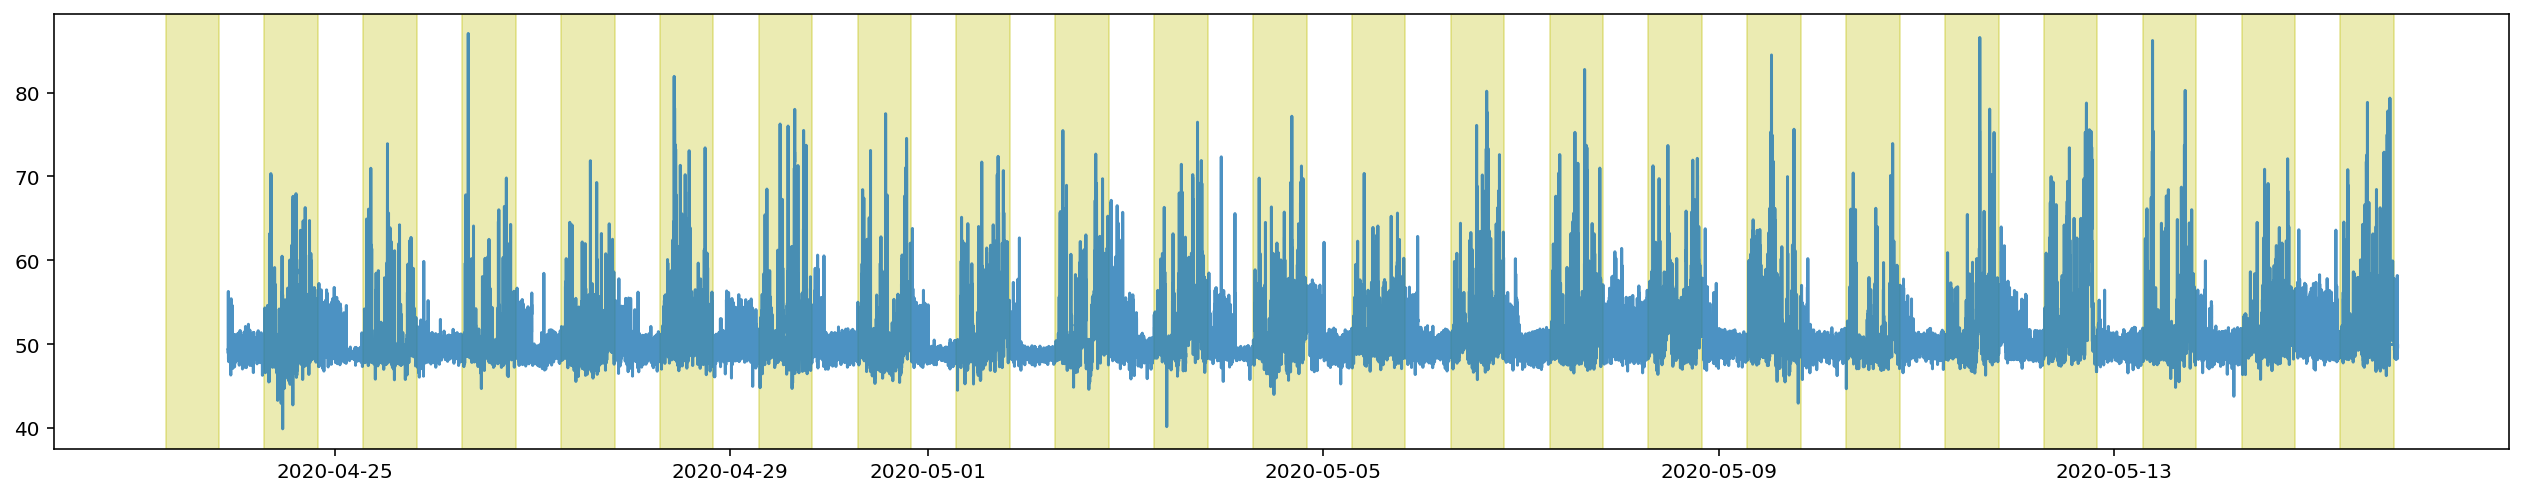

In [14]:
plt.figure(figsize=(22, 4))
plt.plot(df['noise_dB'], '-', ms=1, alpha=0.8)
plot_daytime_bands(df, alpha=0.3)

Neat!  You can see noise continue after 8pm, and silence persists until about 7am.

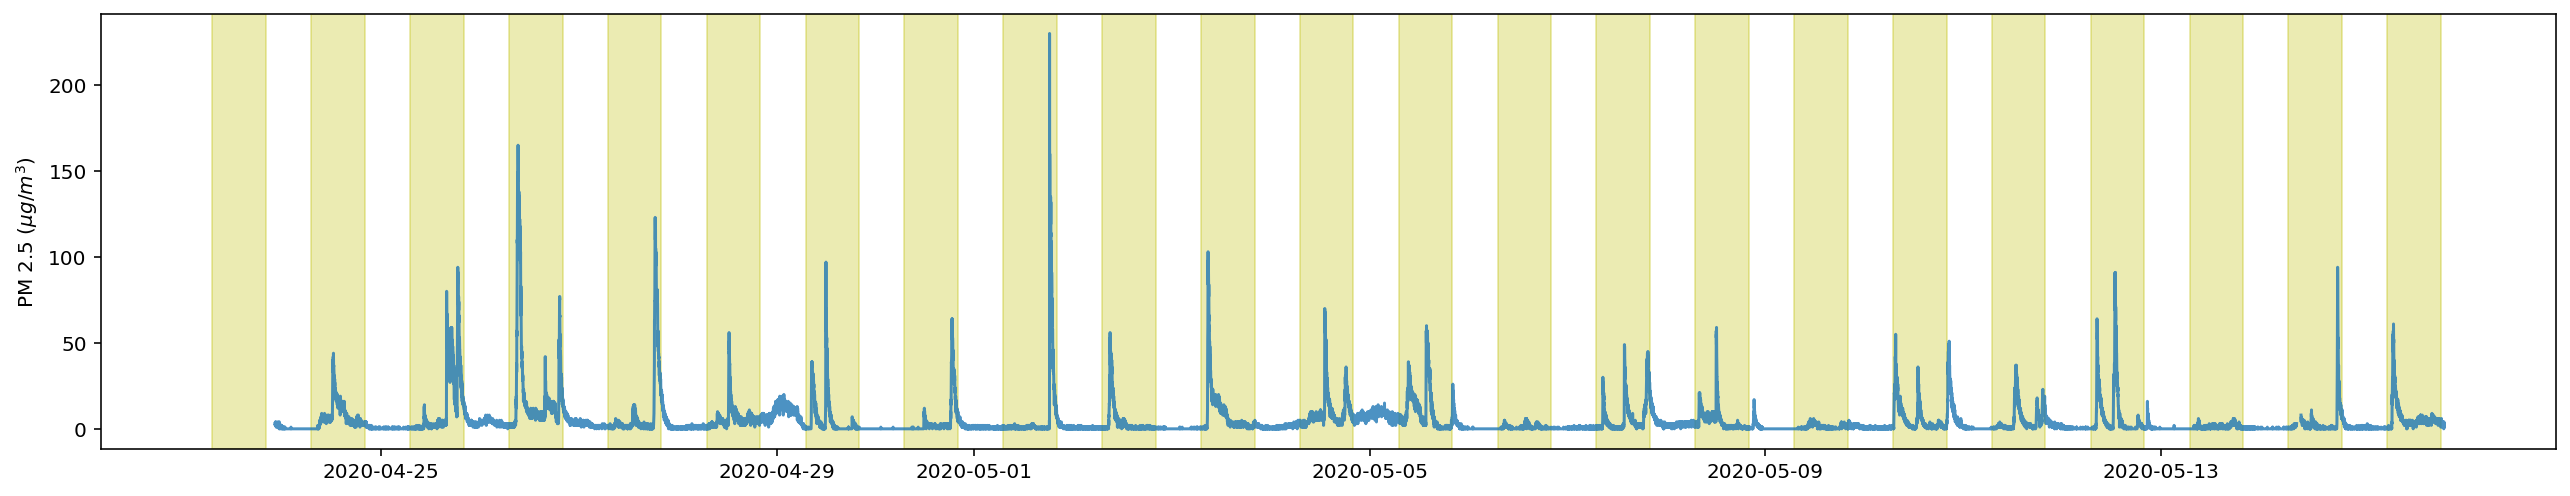

In [15]:
plt.figure(figsize=(22, 4))
plt.plot(df['PM2p5'], '-', ms=1, alpha=0.8)
plt.ylabel('PM 2.5 $(\mu g / m^3)$')
plot_daytime_bands(df, alpha=0.3)

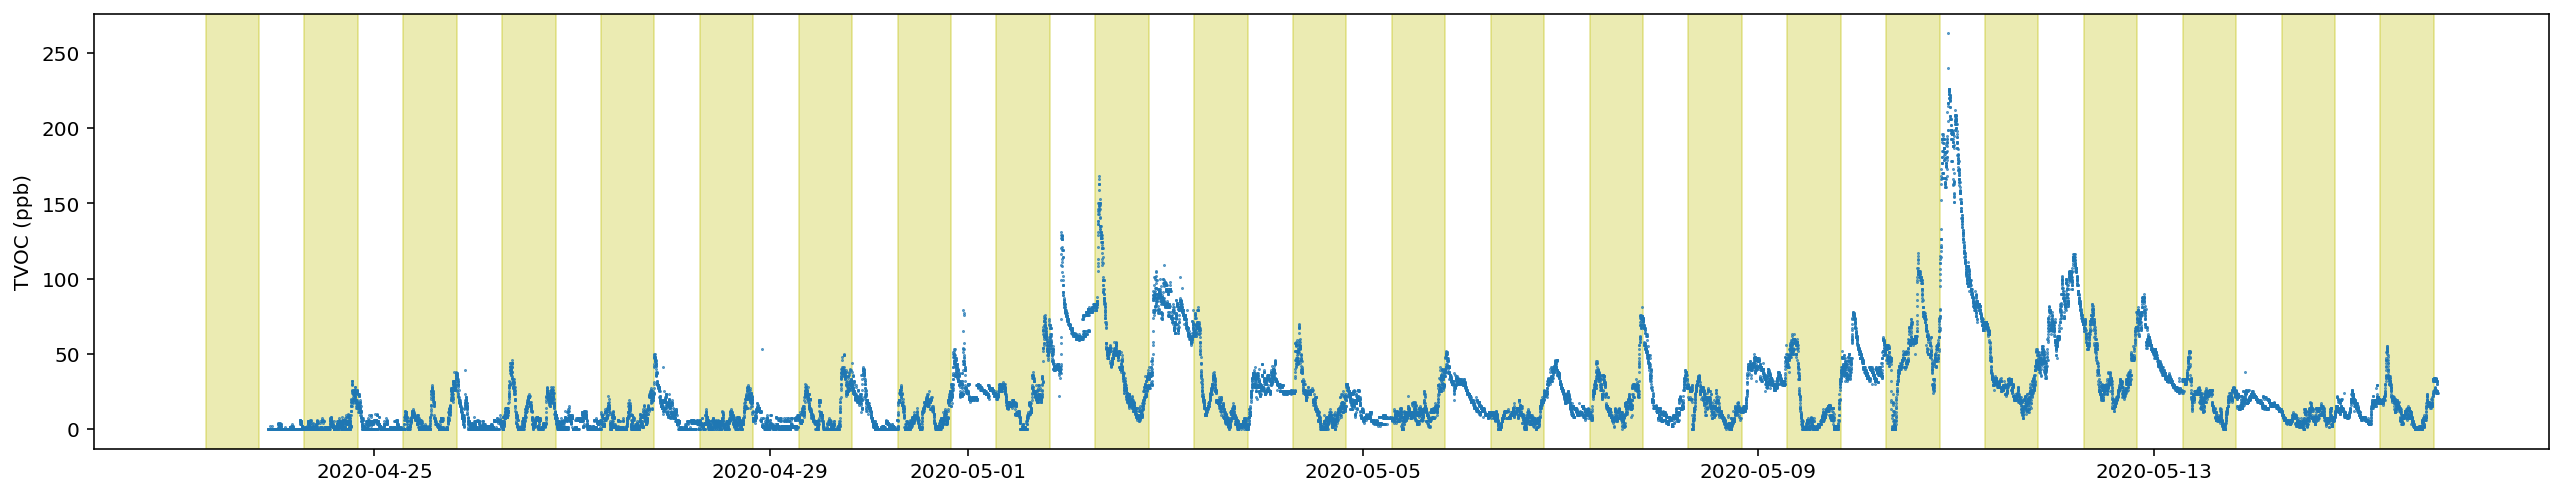

In [16]:
plt.figure(figsize=(22, 4))
plt.plot(df['TVOC'], '.', ms=1, alpha=0.8)
plt.ylabel('TVOC (ppb)')
plot_daytime_bands(df, alpha=0.3)

Fascinating-- the TVOC has peaked in the night time.  Why?  Can't be cooking-- the PM2.5 would also go up.